PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated).

In [95]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import scipy.sparse as ss
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import Binarizer

In [71]:
drinks = pd.read_csv('mdspref.dat', sep='\s+')
print(drinks)

             Coke  CokeCl  DietPepsi  DietSlice  Diet7Up  DrPepper  Pepsi  \
Fruity       5.79    6.49       5.80       2.91     4.29      4.03   5.73   
Carbonation  3.42    3.89       4.87       5.66     4.93      4.36   3.14   
Calories     4.68    5.57       3.36       3.47     3.63      5.40   4.61   
Tart         3.32    4.24       5.01       6.08     6.22      4.47   2.71   
Thirst       4.56    4.19       5.56       5.08     5.52      4.77   4.15   
Popularity   3.35    2.21       4.05       5.86     6.31      5.10   2.24   
Aftertaste   3.95    3.70       5.28       5.21     5.61      4.89   3.71   
Pick-up      3.07    2.71       4.73       6.33     6.31      4.24   3.08   

             Slice   Tab  SevenUp  
Fruity        1.38  5.22     2.86  
Carbonation   5.18  5.24     3.89  
Calories      4.84  3.80     4.50  
Tart          3.73  5.35     3.52  
Thirst        2.77  5.24     2.78  
Popularity    5.63  5.35     3.98  
Aftertaste    4.03  5.17     2.98  
Pick-up       5.07

In [68]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Fruity to Pick-up
Data columns (total 10 columns):
Coke         8 non-null float64
CokeCl       8 non-null float64
DietPepsi    8 non-null float64
DietSlice    8 non-null float64
Diet7Up      8 non-null float64
DrPepper     8 non-null float64
Pepsi        8 non-null float64
Slice        8 non-null float64
Tab          8 non-null float64
SevenUp      8 non-null float64
dtypes: float64(10)
memory usage: 704.0+ bytes


In [69]:
X = drinks.transpose()

In [6]:
X_df.head()

,Fruity,Carbonation,Calories,Tart,Thirst,Popularity,Aftertaste,Pick-up
Coke,5.79,3.42,4.68,3.32,4.56,3.35,3.95,3.07
CokeCl,6.49,3.89,5.57,4.24,4.19,2.21,3.70,2.71
DietPepsi,5.80,4.87,3.36,5.01,5.56,4.05,5.28,4.73
DietSlice,2.91,5.66,3.47,6.08,5.08,5.86,5.21,6.33
Diet7Up,4.29,4.93,3.63,6.22,5.52,6.31,5.61,6.31


In [72]:
pca = PCA(n_components=8)
pca.fit(X_df)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
print(pca.explained_variance_)

[6.94792271e+00 3.35778260e+00 3.71386255e-01 2.28699119e-01
 1.07551395e-01 6.51330390e-02 1.92512008e-02 2.39256580e-03]


In [85]:
# The loading vectors
cp_drinks = pd.DataFrame(PCA().fit(X_df).components_.T, index=X_df.columns, columns=['V1','V2','V3','V4','V5','V6','V7','V8'])
cp_drinks

,V1,V2,V3,V4,V5,V6,V7,V8
Fruity,-0.381042,-0.711273,0.038899,0.018414,0.028281,0.505198,-0.278763,-0.115380
Carbonation,0.293914,-0.031235,0.031539,0.441860,-0.771568,0.199933,0.105145,-0.264686
Calories,-0.187093,0.174167,0.848815,0.141943,0.051845,-0.185045,-0.271351,-0.288906
Tart,0.366731,-0.319922,0.158433,0.649124,0.430453,-0.066930,0.173597,0.311111
Thirst,0.124675,-0.512004,0.089565,-0.305999,-0.009868,-0.458483,0.474486,-0.430360
Popularity,0.541824,0.075612,0.348052,-0.432886,0.144095,0.586822,0.164484,0.000116
Aftertaste,0.244290,-0.302604,0.192333,-0.285654,-0.382426,-0.308013,-0.390867,0.579884
Pick-up,0.479720,-0.031571,-0.292832,0.016949,0.220897,-0.129004,-0.634429,-0.463570


In [86]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7',''],index = X_df.index)
df_plot


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,
Coke,-2.651386,-0.436586,0.044513,-0.587717,0.088413,0.162832,0.203032,-0.000908
CokeCl,-3.506677,-0.898217,0.615186,1.028391,0.043197,0.008279,-0.061437,0.004035
DietPepsi,0.262909,-2.173504,-0.659147,0.002016,-0.421986,-0.082577,0.020887,0.092719
DietSlice,3.639445,-0.112470,-0.378766,0.418515,-0.001216,-0.379246,0.147713,-0.057348
Diet7Up,3.307256,-1.399814,0.088704,-0.209083,0.572728,0.074710,-0.193715,0.025898
DrPepper,0.347839,0.246798,1.265122,-0.426581,-0.005223,-0.258391,0.074548,0.015662
Pepsi,-3.627803,-0.003901,-0.594861,-0.443754,-0.025359,-0.260442,-0.186234,-0.056916
Slice,1.657897,3.543385,0.192207,-0.030594,-0.452085,0.105734,-0.129243,0.013259
Tab,1.459724,-1.521552,0.045753,0.011180,-0.236006,0.487361,0.018663,-0.066349
SevenUp,-0.889205,2.755861,-0.618711,0.237628,0.437538,0.141740,0.105786,0.029948


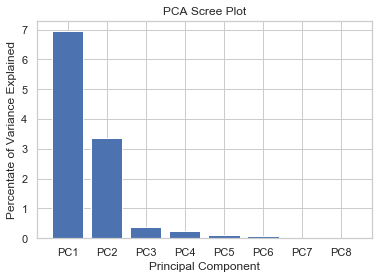

In [87]:
percent_variance = np.round(pca.explained_variance_, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8']
plt.bar(x= range(1,9), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

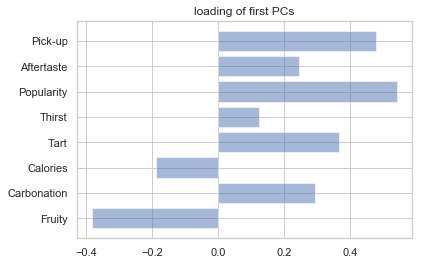

In [88]:
features =('Fruity','Carbonation','Calories','Tart','Thirst','Popularity','Aftertaste','Pick-up')
y_pos = np.arange(len(features))
loading1 = cp_drinks.iloc[:,0]
plt.barh(y_pos, loading1, align='center',alpha=0.5)
plt.yticks(y_pos, features)
plt.title('loading of first PCs')
plt.show()


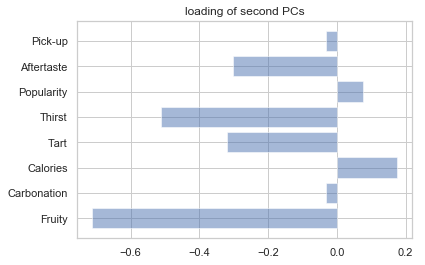

In [89]:
features =('Fruity','Carbonation','Calories','Tart','Thirst','Popularity','Aftertaste','Pick-up')
y_pos = np.arange(len(features))
loading2 = cp_drinks.iloc[:,1]
plt.barh(y_pos, loading2, align='center',alpha=0.5)
plt.yticks(y_pos, features)
plt.title('loading of second PCs')
plt.show()

Now we can use the top two principal components and make scatter plot. We will use Seaborn’s lmplot to make the PCA plot using the `fit_reg=False` option and color clusters with `hue`.

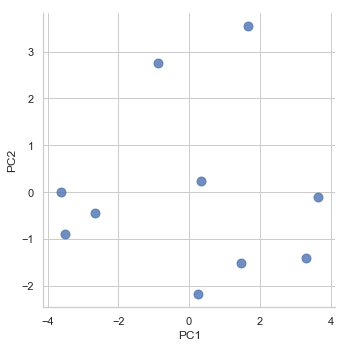

In [91]:
import seaborn as sns
sns.lmplot( x="PC1", y="PC2",
  data=df_plot, 
  fit_reg=False, 
  #hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

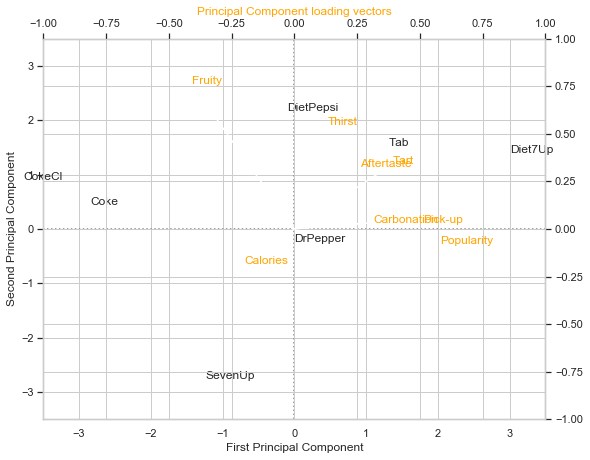

In [93]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in cp_drinks[['V1', 'V2']].index:
    ax2.annotate(i, (cp_drinks.V1.loc[i]*a, -cp_drinks.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

## Singular value decomposition

In [147]:
X_new = scale(X,with_mean=True, with_std=False)

In [146]:
X_new.shape

(10, 8)

In [158]:
# https://galaxydatatech.com/2018/07/15/singular-value-decomposition/
# Singular-value decomposition
#from numpy import array
from scipy.linalg import svd

# SVD
#Reconstruction based on reduced SVD, 2D case:
U, d, V = svd(X_new,full_matrices=False)
print(U)
print(d)
print(V)

[[-3.35292817e-01  7.94185703e-02  2.43471411e-02 -4.09651898e-01
  -8.98640779e-02  2.12675210e-01  4.87770343e-01 -6.18840105e-03]
 [-4.43452376e-01  1.63393055e-01  3.36490284e-01  7.16811347e-01
  -4.39060523e-02  1.08127761e-02 -1.47597445e-01  2.75006549e-02]
 [ 3.32473747e-02  3.95378336e-01 -3.60535320e-01  1.40500294e-03
   4.28912962e-01 -1.07853766e-01  5.01787751e-02  6.31852229e-01]
 [ 4.60242155e-01  2.04593097e-02 -2.07174641e-01  2.91713875e-01
   1.23588313e-03 -4.95334985e-01  3.54869426e-01 -3.90806724e-01]
 [ 4.18233778e-01  2.54637815e-01  4.85184926e-02 -1.45735174e-01
  -5.82128510e-01  9.75797340e-02 -4.65385869e-01  1.76487896e-01]
 [ 4.39875849e-02 -4.48946347e-02  6.91987560e-01 -2.97336594e-01
   5.30887188e-03 -3.37485433e-01  1.79094795e-01  1.06730224e-01]
 [-4.58769925e-01  7.09690326e-04 -3.25372981e-01 -3.09306614e-01
   2.57753361e-02 -3.40165015e-01 -4.47414206e-01 -3.87867625e-01]
 [ 2.09656756e-01 -6.44571138e-01  1.05132016e-01 -2.13248408e-02
   

In [159]:
U.shape

(10, 8)

In [160]:
V.shape

(8, 8)

In [161]:
X_new.shape

(10, 8)

In [205]:
UU=np.array([U[:,0]])
VV=np.array([V[:,0]])
UU.shape

(1, 10)

In [207]:
## rank 1 approximation
R1 = d[0]*UU.T@VV.round(2)

In [214]:
d[0:2]

array([7.90767377, 5.497276  ])

In [215]:
np.diag(d[0:2])

array([[7.90767377, 0.        ],
       [0.        , 5.497276  ]])

In [230]:
G = U[:,0:2]@np.diag(d[0:2])

In [234]:
H = V[:,0:2]